In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets (replace file paths with actual paths)
status = pd.read_excel(r"C:\Users\harik\Downloads\EduPredict_MVP\EduPredict_MVP\datasets\status.xlsx")  
academic = pd.read_excel(r"C:\Users\harik\Downloads\EduPredict_MVP\EduPredict_MVP\datasets\academic.xlsx")  
academic_detail = pd.read_excel(r"C:\Users\harik\Downloads\EduPredict_MVP\EduPredict_MVP\datasets\academic_detail.xlsx")  
capstone = pd.read_excel(r"C:\Users\harik\Downloads\EduPredict_MVP\EduPredict_MVP\datasets\Capstone.xlsx")  
DSCI_data = pd.read_excel(r"C:\Users\harik\Downloads\EduPredict_MVP\EduPredict_MVP\datasets\DSCI-6051-capstone_Data.xlsx")  
field_of_study = pd.read_excel(r"C:\Users\harik\Downloads\EduPredict_MVP\EduPredict_MVP\datasets\field_of_study.xlsx")  
origin = pd.read_excel(r"C:\Users\harik\Downloads\EduPredict_MVP\EduPredict_MVP\datasets\origin.xlsx")  
source_of_fund = pd.read_excel(r"C:\Users\harik\Downloads\EduPredict_MVP\EduPredict_MVP\datasets\source_of_fund.xlsx")


C:\Users\harik\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [6]:
# Display first few rows of each dataset
for df, name in zip([status, academic, academic_detail, capstone, DSCI_data, 
                     field_of_study, origin, source_of_fund], 
                    ["Status", "Academic", "Academic Detail", "Capstone", "DSCI Data", 
                     "Field of Study", "Origin", "Source of Fund"]):
    print(f"Dataset: {name}")
    print(df.info(), "\n")
    print(df.head(), "\n")
    
# Check missing values
for df, name in zip([status, academic, academic_detail, capstone, DSCI_data, 
                     field_of_study, origin, source_of_fund], 
                    ["Status", "Academic", "Academic Detail", "Capstone", "DSCI Data", 
                     "Field of Study", "Origin", "Source of Fund"]):
    print(f"Missing values in {name} dataset:")
    print(df.isnull().sum(), "\n")


Dataset: Status
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 74 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   year               13 non-null     object
 1   students           13 non-null     int64 
 2   undergraduate      13 non-null     int64 
 3   graduate           13 non-null     int64 
 4   non_degree         13 non-null     int64 
 5   opt                13 non-null     int64 
 6   female             13 non-null     int64 
 7   male               13 non-null     int64 
 8   single             13 non-null     int64 
 9   married            13 non-null     int64 
 10  full_time          13 non-null     int64 
 11  part_time          13 non-null     int64 
 12  visa_f             13 non-null     int64 
 13  visa_j             13 non-null     int64 
 14  visa_other         13 non-null     int64 
 15  UG_Associates      13 non-null     int64 
 16  UG_Bachelors       13 non-null

In [7]:


# Rename columns to ensure consistent 'year' column name
status.rename(columns={'Year': 'year'}, inplace=True)  # Example: Rename 'Year' to 'year'
academic.rename(columns={'Year': 'year'}, inplace=True)
academic_detail.rename(columns={'Year': 'year'}, inplace=True)
field_of_study.rename(columns={'Year': 'year'}, inplace=True)
origin.rename(columns={'Year': 'year'}, inplace=True)
source_of_fund.rename(columns={'Year': 'year'}, inplace=True)
capstone.rename(columns={'Year': 'year'}, inplace=True)






In [8]:
# Drop rows with NaN values in 'year'
status = status.dropna(subset=["year"])
academic = academic.dropna(subset=["year"])
academic_detail = academic_detail.dropna(subset=["year"])
field_of_study = field_of_study.dropna(subset=["year"])
origin = origin.dropna(subset=["year"])
source_of_fund = source_of_fund.dropna(subset=["year"])
capstone = capstone.dropna(subset=["year"])

In [10]:
import pandas as pd

# Convert 'year' to integer by extracting the first part (e.g., '2010' from '2010/11')
def clean_year(df):
    df["year"] = df["year"].astype(str).str.split("/").str[0]  # Extract first part
    df["year"] = pd.to_numeric(df["year"], errors="coerce")  # Convert to integer
    return df

# Apply the function to all datasets before merging
status = clean_year(status)
academic = clean_year(academic)
academic_detail = clean_year(academic_detail)
field_of_study = clean_year(field_of_study)
origin = clean_year(origin)
source_of_fund = clean_year(source_of_fund)
capstone = clean_year(capstone)

# Drop any rows where 'year' is still NaN after conversion
status.dropna(subset=["year"], inplace=True)
academic.dropna(subset=["year"], inplace=True)
academic_detail.dropna(subset=["year"], inplace=True)
field_of_study.dropna(subset=["year"], inplace=True)
origin.dropna(subset=["year"], inplace=True)
source_of_fund.dropna(subset=["year"], inplace=True)
capstone.dropna(subset=["year"], inplace=True)

# Convert 'year' to int again to ensure consistency
status["year"] = status["year"].astype(int)
academic["year"] = academic["year"].astype(int)
academic_detail["year"] = academic_detail["year"].astype(int)
field_of_study["year"] = field_of_study["year"].astype(int)
origin["year"] = origin["year"].astype(int)
source_of_fund["year"] = source_of_fund["year"].astype(int)
capstone["year"] = capstone["year"].astype(int)

# Now merge the datasets with suffixes to avoid column name conflicts
merged_df = status.merge(academic, on="year", how="inner", suffixes=('_status', '_academic'))
merged_df = merged_df.merge(academic_detail, on="year", how="inner", suffixes=('', '_academic_detail'))
merged_df = merged_df.merge(field_of_study, on="year", how="left", suffixes=('', '_field_of_study'))
merged_df = merged_df.merge(origin, on=["year", "academic_type"], how="left", suffixes=('', '_origin'))
merged_df = merged_df.merge(source_of_fund, on=["year", "academic_type"], how="left", suffixes=('', '_source_of_fund'))
merged_df = merged_df.merge(capstone, on="year", how="left", suffixes=('', '_capstone'))

# Fill missing values with 0
merged_df.fillna(0, inplace=True)

# Display merged dataset preview
print("Merged dataset preview:")
print(merged_df.head())


Merged dataset preview:
   year  students_status  undergraduate_status  graduate_status  \
0  2011           764495                309342           300430   
1  2011           764495                309342           300430   
2  2011           764495                309342           300430   
3  2011           764495                309342           300430   
4  2011           764495                309342           300430   

   non_degree_status  opt_status  female    male  single  married  ...  \
0              69566       85157  338671  425824  690339    74156  ...   
1              69566       85157  338671  425824  690339    74156  ...   
2              69566       85157  338671  425824  690339    74156  ...   
3              69566       85157  338671  425824  690339    74156  ...   
4              69566       85157  338671  425824  690339    74156  ...   

            origin_region       origin  students_origin    source_type  \
0  South and Central Asia  Afghanistan              16

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


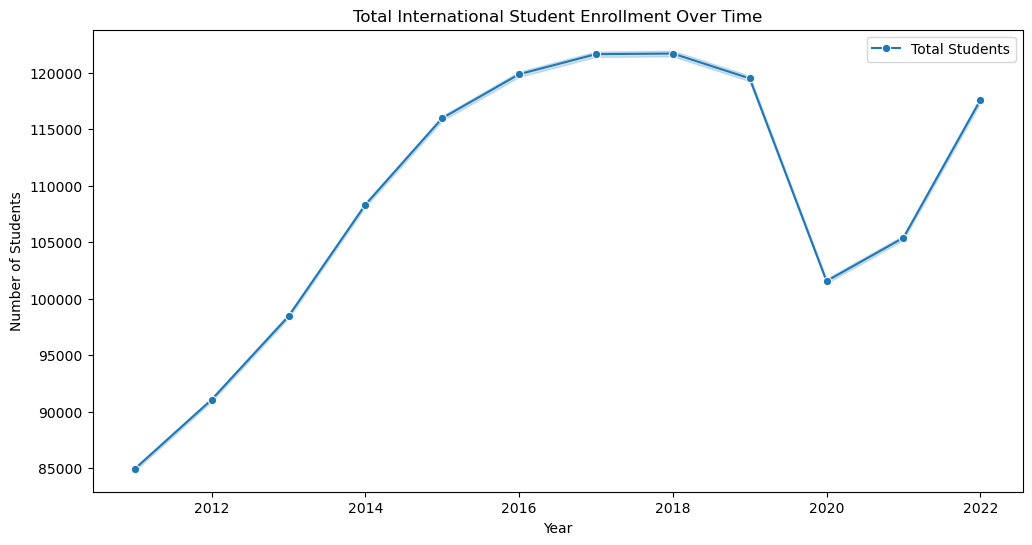

In [25]:
# Convert 'students' column to numeric, coercing any errors to NaN
merged_df["students"] = pd.to_numeric(merged_df["students"], errors="coerce")

# Drop rows where 'students' is NaN (optional, depending on how you want to handle missing data)
merged_df = merged_df.dropna(subset=["students"])

# Plot the data
plt.figure(figsize=(12,6))
sns.lineplot(data=merged_df, x="year", y="students", label="Total Students", marker="o")
plt.xlabel("Year")
plt.ylabel("Number of Students")
plt.title("Total International Student Enrollment Over Time")
plt.legend()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


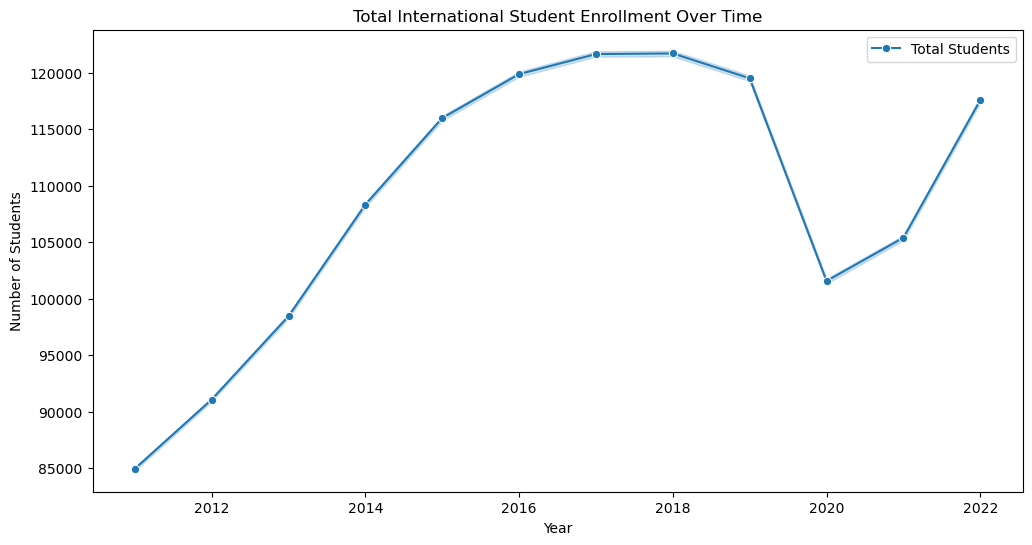

In [26]:
plt.figure(figsize=(12,6))
sns.lineplot(data=merged_df, x="year", y="students", label="Total Students", marker="o")
plt.xlabel("Year")
plt.ylabel("Number of Students")
plt.title("Total International Student Enrollment Over Time")
plt.legend()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

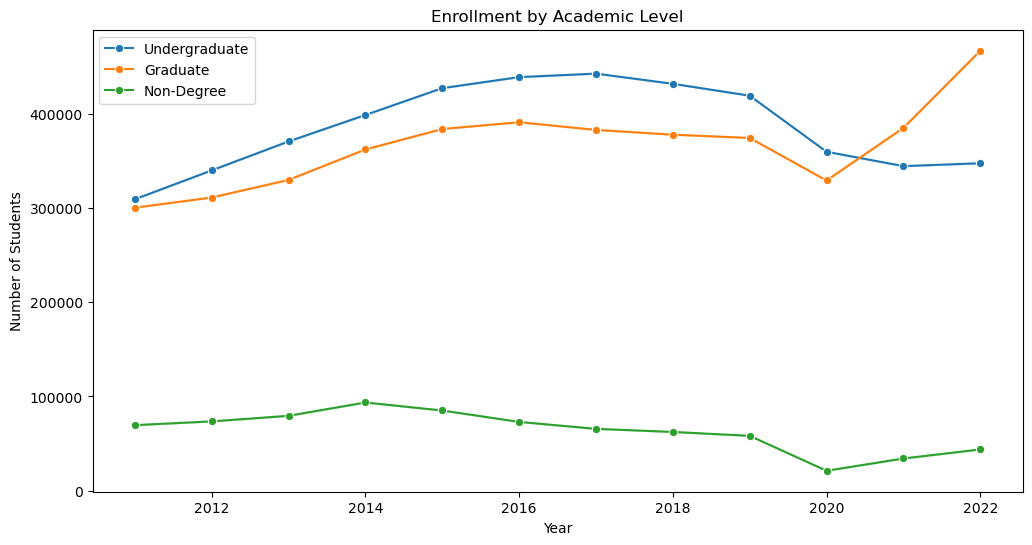

In [13]:
plt.figure(figsize=(12,6))
sns.lineplot(data=merged_df, x="year", y="undergraduate_status", label="Undergraduate", marker="o")
sns.lineplot(data=merged_df, x="year", y="graduate_status", label="Graduate", marker="o")
sns.lineplot(data=merged_df, x="year", y="non_degree_status", label="Non-Degree", marker="o")
plt.xlabel("Year")
plt.ylabel("Number of Students")
plt.title("Enrollment by Academic Level")
plt.legend()
plt.show()

In [14]:
# Check the columns in merged_df
print(merged_df.columns)


Index(['year', 'students_status', 'undergraduate_status', 'graduate_status',
       'non_degree_status', 'opt_status', 'female', 'male', 'single',
       'married', 'full_time', 'part_time', 'visa_f', 'visa_j', 'visa_other',
       'UG_Associates', 'UG_Bachelors', 'Grad_Masters', 'Grad_Doctoral',
       'Grad_Professional', 'Grad_Others', 'Non-Degree_IE',
       'Non-Degree_Others', 'OPT', 'UG_I_Fam', 'UG_I_Govt', 'UG_I_Pvt_Spr',
       'UG_I_INT_ORG', 'UG_US_Cur_Emp', 'UG_US_Clg', 'UG_US_Govt',
       'UG_US_Pvt_Spr', 'UG_Others', 'Grad_I_Fam', 'Grad_I_Govt',
       'Grad_I_Pvt_Spr', 'Grad_I_INT_ORG', 'Grad_US_Cur_Emp', 'Grad_US_Clg',
       'Grad_US_Govt', 'Grad_US_Pvt_Spr', 'Grad_Others.1', 'ND_I_Fam',
       'ND_I_Govt', 'ND_I_Pvt_Spr', 'ND_I_INT_ORG', 'ND_US_Cur_Emp',
       'ND_US_Clg', 'ND_US_Govt', 'ND_US_Pvt_Spr', 'ND_Others', 'OPT_I_Fam',
       'OPT_I_Govt', 'OPT_I_Pvt_Spr', 'OPT_I_INT_ORG', 'OPT_US_Cur_Emp',
       'OPT_US_Clg', 'OPT_US_Govt', 'OPT_US_Pvt_Spr', 'OPT_Others'

   year  students_status  undergraduate_status  graduate_status  \
0  2011           764495                309342           300430   
1  2011           764495                309342           300430   
2  2011           764495                309342           300430   
3  2011           764495                309342           300430   
4  2011           764495                309342           300430   

   non_degree_status  opt_status  female    male  single  married  ...  \
0              69566       85157  338671  425824  690339    74156  ...   
1              69566       85157  338671  425824  690339    74156  ...   
2              69566       85157  338671  425824  690339    74156  ...   
3              69566       85157  338671  425824  690339    74156  ...   
4              69566       85157  338671  425824  690339    74156  ...   

            origin_region       origin  students_origin    source_type  \
0  South and Central Asia  Afghanistan              166  International   
1  S

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='undergraduate_status'>

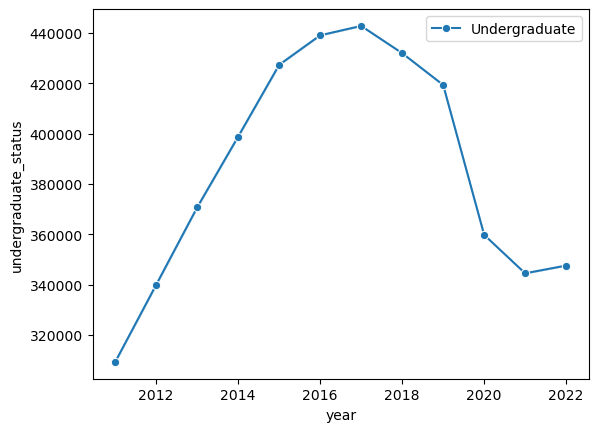

In [15]:
# Check the first few rows to understand the structure of your DataFrame
print(merged_df.head())

# Adjust column names based on what you find in the previous step
sns.lineplot(data=merged_df, x="year", y="undergraduate_status", label="Undergraduate", marker="o")


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

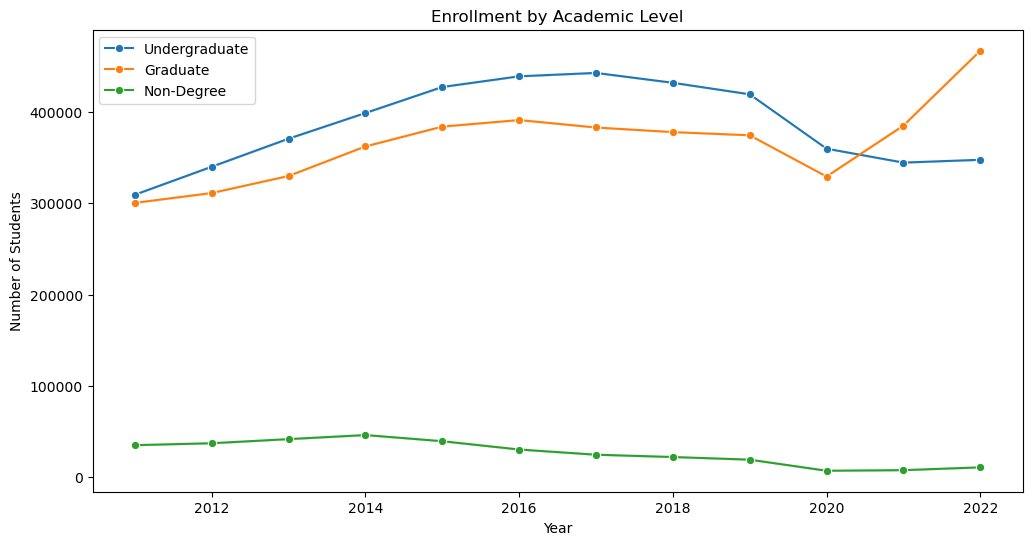

In [17]:
plt.figure(figsize=(12,6))
sns.lineplot(data=merged_df, x="year", y="undergraduate_status", label="Undergraduate", marker="o")
sns.lineplot(data=merged_df, x="year", y="graduate_status", label="Graduate", marker="o")
sns.lineplot(data=merged_df, x="year", y="Non-Degree_IE", label="Non-Degree", marker="o")
plt.xlabel("Year")
plt.ylabel("Number of Students")
plt.title("Enrollment by Academic Level")
plt.legend()
plt.show()

C:\Users\harik\AppData\Local\Temp\ipykernel_36596\3920403151.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged_df, x="field_of_study", y="students", ci=None)


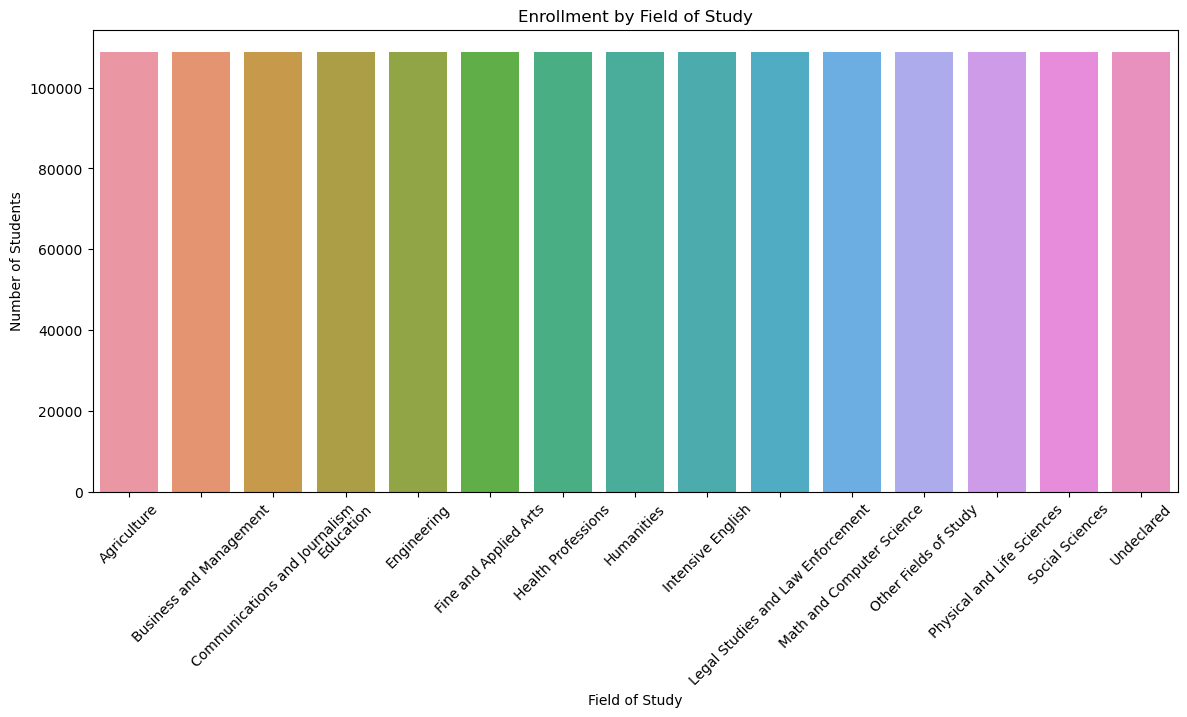

In [39]:
plt.figure(figsize=(14,6))
sns.barplot(data=merged_df, x="field_of_study", y="students", ci=None)
plt.xticks(rotation=45)
plt.xlabel("Field of Study")
plt.ylabel("Number of Students")
plt.title("Enrollment by Field of Study")
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

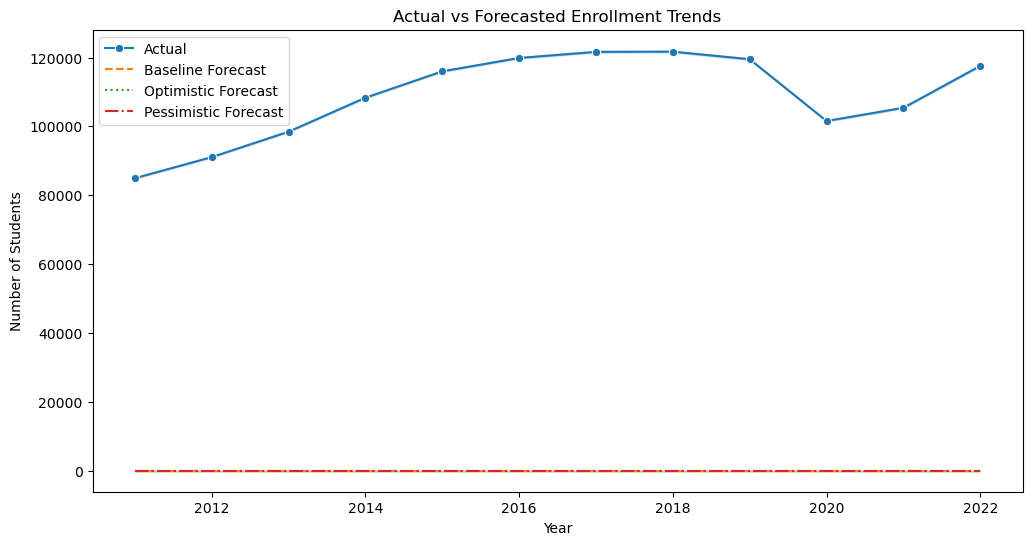

In [18]:
plt.figure(figsize=(12,6))
sns.lineplot(data=merged_df, x="year", y="students", label="Actual", marker="o")
sns.lineplot(data=merged_df, x="year", y="Baseline", label="Baseline Forecast", linestyle="dashed")
sns.lineplot(data=merged_df, x="year", y="Optimistic", label="Optimistic Forecast", linestyle="dotted")
sns.lineplot(data=merged_df, x="year", y="Pessimistic", label="Pessimistic Forecast", linestyle="dashdot")
plt.xlabel("Year")
plt.ylabel("Number of Students")
plt.title("Actual vs Forecasted Enrollment Trends")
plt.legend()
plt.show()
